/var/folders/q0/m9gtt3651l7dbfrwm3x7fd440000gn/T/ipykernel_24882/2250210432.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Measure', y='Score', hue='Group', data=df_melted, palette='Set2', ci=None)


ValueError: 'yerr' (shape: (4,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (1,))

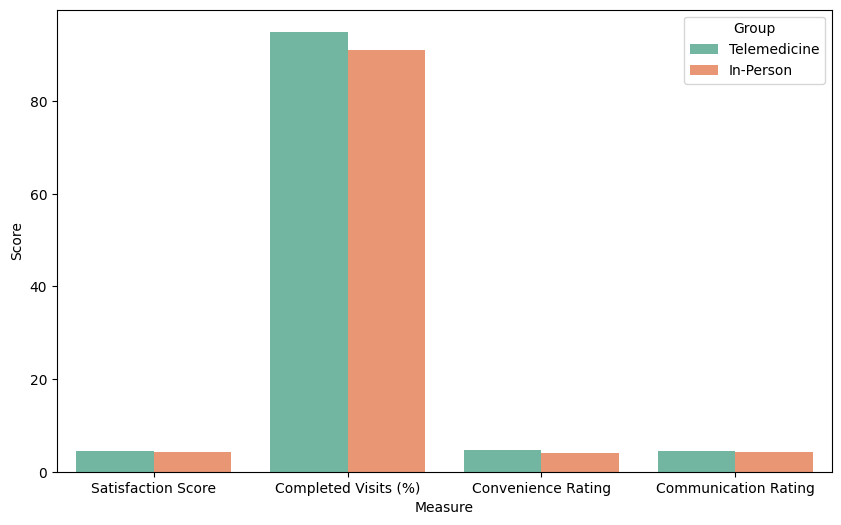

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -----------------------------
# Patient Satisfaction Data
# -----------------------------
data = {
    'Measure': ['Satisfaction Score', 'Completed Visits (%)', 'Convenience Rating', 'Communication Rating'],
    'Telemedicine_Mean': [4.5, 95, 4.6, 4.5],
    'Telemedicine_SD': [0.4, 0, 0.3, 0.4],  # SD for error bars (0 for % data)
    'InPerson_Mean': [4.2, 91, 4.1, 4.2],
    'InPerson_SD': [0.5, 0, 0.5, 0.5]
}

df = pd.DataFrame(data)

# Melt the dataframe for seaborn
df_melted = df.melt(id_vars='Measure', value_vars=['Telemedicine_Mean','InPerson_Mean'],
                    var_name='Group', value_name='Score')

# Map SD for error bars
error_map = {
    'Telemedicine_Mean': df['Telemedicine_SD'],
    'InPerson_Mean': df['InPerson_SD']
}
df_melted['SD'] = df_melted['Group'].map(error_map)

# Replace group names for clarity
df_melted['Group'] = df_melted['Group'].replace({'Telemedicine_Mean':'Telemedicine', 'InPerson_Mean':'In-Person'})

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Measure', y='Score', hue='Group', data=df_melted, palette='Set2', ci=None)

# Add error bars manually
for i in range(len(df_melted)):
    plt.errorbar(x=i//2 + (0.2 if df_melted['Group'][i]=='Telemedicine' else -0.2),
                 y=df_melted['Score'][i],
                 yerr=df_melted['SD'][i],
                 fmt='none', c='black', capsize=5)

plt.title('Patient Satisfaction and Clinical Adherence by Group')
plt.ylabel('Score / Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=20)
plt.legend(title='Group')
plt.tight_layout()
plt.show()


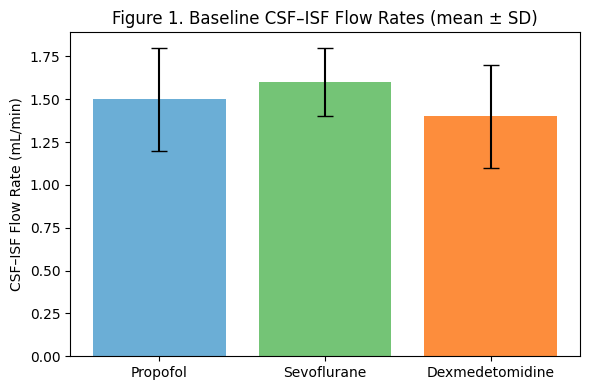

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    "Group": ["Propofol", "Sevoflurane", "Dexmedetomidine"],
    "Flow Rate (mL/min)": [1.5, 1.6, 1.4],
    "SD": [0.3, 0.2, 0.3]
}
df = pd.DataFrame(data)

plt.figure(figsize=(6,4))
plt.bar(df["Group"], df["Flow Rate (mL/min)"], yerr=df["SD"], capsize=6, color=["#86bcdb","#a6d3a7","#e0a983"])
plt.ylabel("CSF–ISF Flow Rate (mL/min)")
plt.title("Figure 1. Baseline CSF–ISF Flow Rates (mean ± SD)")
plt.tight_layout()
plt.savefig("figure1_flow_rates.png", dpi=300)
plt.show()


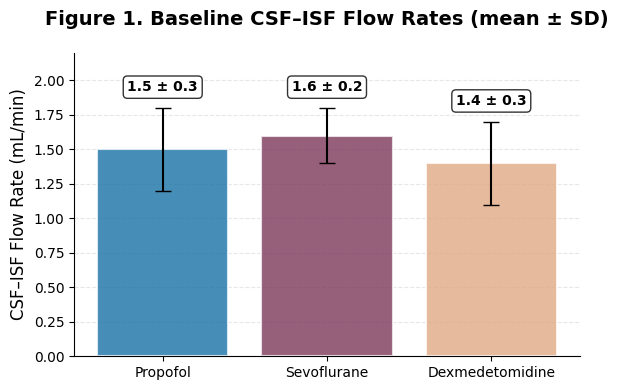

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    "Group": ["Propofol", "Sevoflurane", "Dexmedetomidine"],
    "Flow Rate (mL/min)": [1.5, 1.6, 1.4],
    "SD": [0.3, 0.2, 0.3]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(6, 4))

# Use more subtle, professional colors
subtle_colors = ["#1872a6","#7c385a","#e0a983"]

bars = ax.bar(
    df["Group"],
    df["Flow Rate (mL/min)"],
    yerr=df["SD"],
    capsize=6,
    color=subtle_colors,
    alpha=0.8,  # Add slight transparency for subtlety
    edgecolor='white',
    linewidth=1.5
)

ax.set_ylabel("CSF–ISF Flow Rate (mL/min)", fontsize=12)
ax.set_title("Figure 1. Baseline CSF–ISF Flow Rates (mean ± SD)", fontsize=14, fontweight='bold', pad=20)

# Set y-axis limits to provide more space
ax.set_ylim(0, 2.2)

# Place "mean ± SD" above each error bar with proper spacing
for bar, mean, sd in zip(bars, df["Flow Rate (mL/min)"], df["SD"]):
    # Get the bar's x center
    x = bar.get_x() + bar.get_width() / 2
    # Position text well above the top of the error bar
    y = mean + sd + 0.1  # Increased spacing from 0.05 to 0.1
    ax.text(
        x, y,
        f"{mean:.1f} ± {sd:.1f}",
        ha='center', va='bottom',
        fontsize=10, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)  # Add background box
    )

# Improve overall appearance
ax.grid(True, alpha=0.3, linestyle='--', axis='y')
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("figure1_flow_rates.png", dpi=300, bbox_inches='tight')
plt.show()